In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lorry\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df = pd.read_csv('Annual_Greenhouse_Gas_(GHG)_Air_Emissions_Accounts.csv')
df.head()

,ObjectId2,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1,Advanced Economies,NaN,AETMP,Annual greenhouse gas (GHG) air emissions acco...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Economic Activity...",...,192.339165,189.879210,190.640948,192.311131,194.105776,192.704136,193.513983,192.195495,185.547304,198.697198
1,2,Advanced Economies,NaN,AETMP,Annual greenhouse gas (GHG) air emissions acco...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Economic Activity...",...,1334.080022,1377.129794,1392.838449,1398.296064,1388.139335,1392.272111,1403.557273,1402.235004,1309.461477,1395.472813
2,3,Advanced Economies,NaN,AETMP,Annual greenhouse gas (GHG) air emissions acco...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Economic Activity...",...,610.012779,605.660005,606.433530,610.965086,616.762846,621.921696,625.163252,620.809814,578.861084,631.669794
3,4,Advanced Economies,NaN,AETMP,Annual greenhouse gas (GHG) air emissions acco...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Economic Activity...",...,531.728078,581.590579,595.763971,595.019846,577.270713,577.646278,584.880038,589.229695,545.053089,565.105820
4,5,Advanced Economies,NaN,AETMP,Annual greenhouse gas (GHG) air emissions acco...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Economic Activity...",...,311.931582,321.734883,324.584852,340.740833,362.842685,363.956350,367.397959,372.190736,342.460527,351.010492


In [9]:
df = df.drop(columns=['ISO2','ISO3','Indicator','Unit','Source','CTS_Code','CTS_Name','CTS_Full_Descriptor','Scale'])

In [78]:
df_adv = df[df['Country']=='Advanced Economies']
df_dev = df[df['Country']=='Emerging and Developing Economies']

In [79]:
print(df_adv.shape)
print(df_dev.shape)

(45, 16)
(45, 16)


In [80]:
industry_list = df_adv['Industry'].value_counts()
industry_list = industry_list.index.to_list()
industry_list.remove('Total Industry and Households')
industry_list

['Manufacturing',
 'Other Services Industries',
 'Total Households',
 'Transportation and Storage',
 'Agriculture, Forestry and Fishing',
 'Construction',
 'Electricity, Gas, Steam and Air Conditioning Supply',
 'Mining',
 'Water supply; sewerage, waste management and remediation activities']

In [81]:
industry_adv_2010 = []
industry_adv_2021 = []
for i in industry_list:
    e = df_adv[(df_adv['Industry']==f"{i}") & (df_adv['Gas_Type']=='Greenhouse gas')]
    e = e.reset_index()
    a = e['F2010'][0]
    b = e['F2021'][0]
    industry_adv_2010.append(a)
    industry_adv_2021.append(b)
print(industry_adv_2010)
print(industry_adv_2021)

[2658.969506, 997.6950369, 2360.028807, 1486.632926, 1370.155305, 338.6788362, 4710.550553, 584.6582741, 426.314166]
[2495.769757, 966.1253863, 2143.215589, 1509.42836, 1395.472813, 356.6465248, 3521.237157, 566.8744381, 390.9517795]


In [82]:
industry_adv_2010 = np.asarray(industry_adv_2010)
industry_adv_2010.sum()

14933.6834102

In [83]:
industry_adv_2021 = np.asarray(industry_adv_2021)
industry_adv_2021.sum()

13345.721804699999

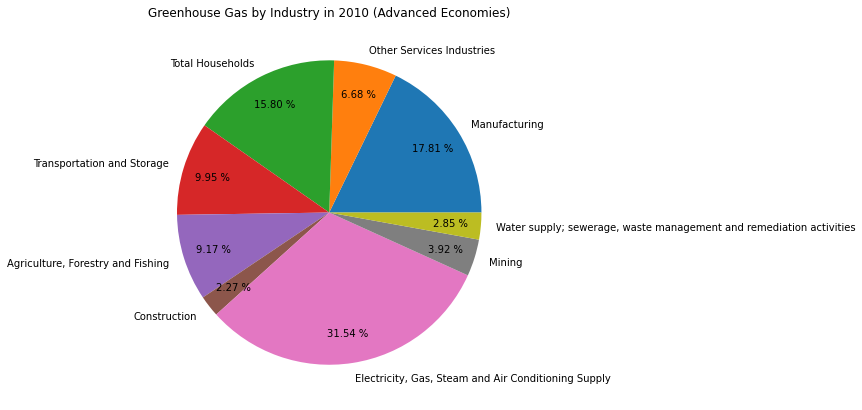

In [84]:
plt.figure(figsize=(7,7))
plt.title('Greenhouse Gas by Industry in 2010 (Advanced Economies)')
plt.pie(industry_adv_2010, labels=industry_list, pctdistance=0.8,autopct='%.2f %%')
plt.show()

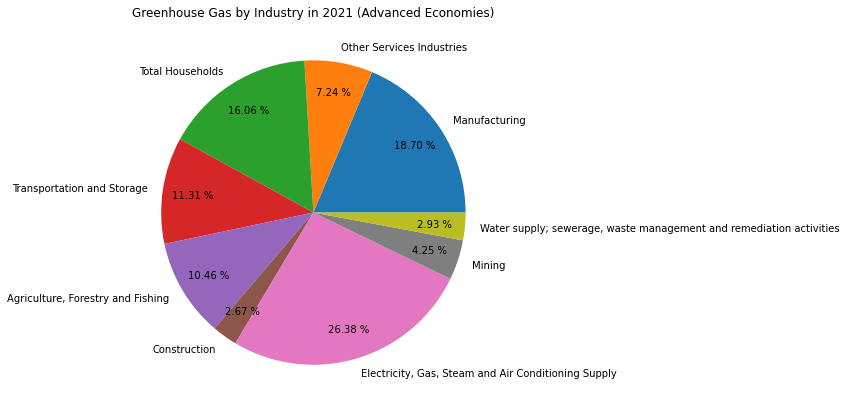

In [85]:
plt.figure(figsize=(7,7))
plt.title('Greenhouse Gas by Industry in 2021 (Advanced Economies)')
plt.pie(industry_adv_2021, labels=industry_list, pctdistance=0.8,autopct='%.2f %%')
plt.show()

In [86]:
industry_dev_2010 = []
industry_dev_2021 = []
for i in industry_list:
    e = df_dev[(df_dev['Industry']==f"{i}") & (df_dev['Gas_Type']=='Greenhouse gas')]
    e = e.reset_index()
    a = e['F2010'][0]
    b = e['F2021'][0]
    industry_dev_2010.append(a)
    industry_dev_2021.append(b)
print(industry_dev_2010)
print(industry_dev_2021)

[5777.958555, 1489.467017, 2500.076187, 1227.909152, 4745.502995, 2442.48446, 7750.997618, 2030.77269, 2323.479155]
[7533.504765, 1824.090598, 3305.732887, 1610.967245, 5265.137533, 2718.395613, 10547.60959, 2235.843957, 2952.705061]


In [87]:
industry_dev_2021 = np.asarray(industry_dev_2021)
industry_dev_2021.sum()

37993.987249

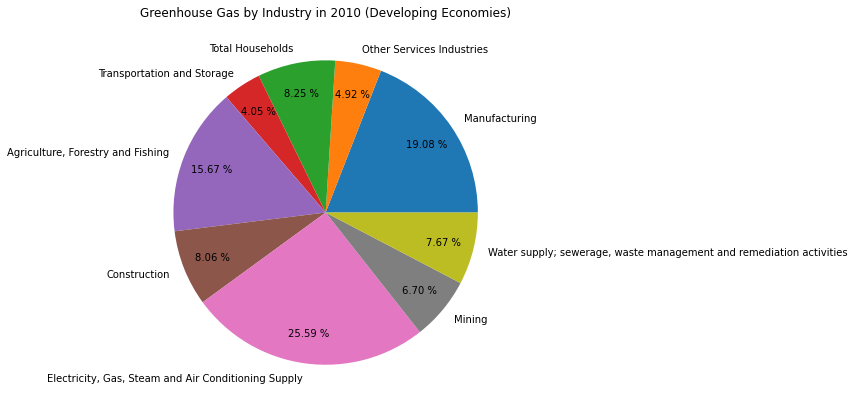

In [91]:
plt.figure(figsize=(7,7))
plt.title('Greenhouse Gas by Industry in 2010 (Developing Economies)')
plt.pie(industry_dev_2010, labels=industry_list, pctdistance=0.8,autopct='%.2f %%')
plt.show()

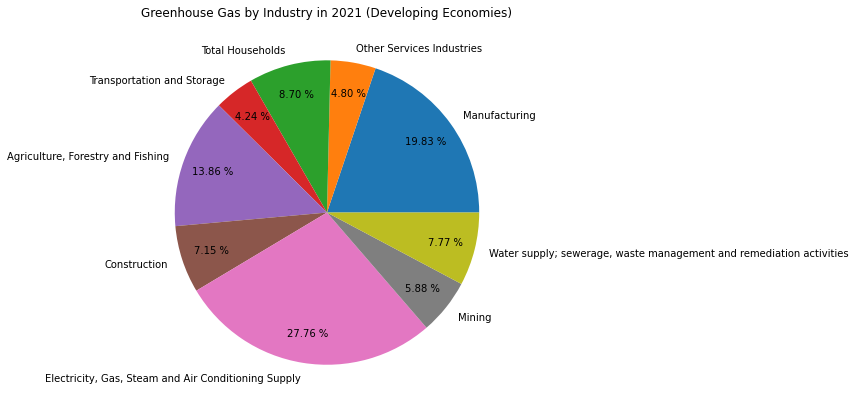

In [89]:
plt.figure(figsize=(7,7))
plt.title('Greenhouse Gas by Industry in 2021 (Developing Economies)')
plt.pie(industry_dev_2021, labels=industry_list, pctdistance=0.8,autopct='%.2f %%')
plt.show()

In [97]:
world_total = df[(df['Country']=='World') & (df['Industry']=='Total Industry and Households') & (df['Gas_Type']=='Greenhouse gas')]
world_total = world_total.iloc[:,4:17]
world_total = world_total.T.to_numpy()
world_total

array([[45222.33124],
       [46490.97004],
       [47245.78952],
       [47843.40692],
       [48231.3643 ],
       [48136.03239],
       [48264.04084],
       [48960.34439],
       [49898.12521],
       [50263.4517 ],
       [47935.36664],
       [51339.70905]])

In [108]:
years = df[(df['Country']=='World') & (df['Industry']=='Total Industry and Households') & (df['Gas_Type']=='Greenhouse gas')].columns[4:17]

In [112]:
years2 = []
for i in years:
    years2.append(i[1:5])

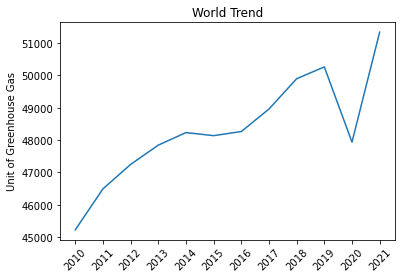

In [116]:
plt.title('World Trend')
plt.plot(years2, world_total)
plt.xticks(rotation=45)
plt.ylabel('Unit of Greenhouse Gas')
plt.show()

In [117]:
from sklearn.linear_model import LinearRegression
X = [[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021]]
y = world_total
lin_reg = LinearRegression().fit(X, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[398.61154105]]
[-755082.31663083]


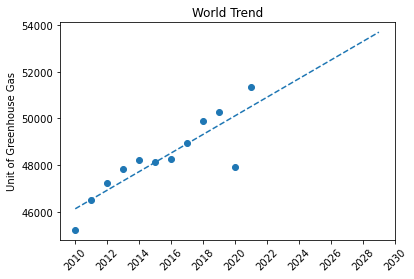

In [143]:
plt.title('World Trend')
X = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
plt.scatter(X, world_total)
plt.xticks(rotation=45)
plt.ylabel('Unit of Greenhouse Gas')
x = np.arange(2010, 2030)
y=398.61*x-755082.32
plt.plot(x, y, '--')
plt.xticks([2010,2012,2014,2016,2018,2020,2022,2024,2026,2028,2030])
plt.show()

In [146]:
lin_reg.predict([[2030]])

array([[54099.11169854]])

In [148]:
g7_total = df[(df['Country']=='G7') & (df['Industry']=='Total Industry and Households') & (df['Gas_Type']=='Greenhouse gas')]
g7_total = g7_total.iloc[:,4:17]
g7_total = g7_total.T.to_numpy()
g7_total

array([[11494.50128 ],
       [11276.43991 ],
       [11081.40798 ],
       [11241.15387 ],
       [11101.74344 ],
       [10925.04842 ],
       [10711.41517 ],
       [10643.79724 ],
       [10744.02593 ],
       [10512.26792 ],
       [ 9642.877883],
       [10041.49924 ]])

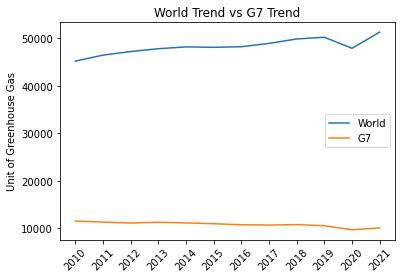

In [149]:
plt.title('World Trend vs G7 Trend')
plt.plot(years2, world_total)
plt.plot(years2, g7_total)
plt.xticks(rotation=45)
plt.legend(['World', 'G7'])
plt.ylabel('Unit of Greenhouse Gas')
plt.show()